# Generating Synthetic data

In [281]:
import pandas as pd
import numpy as np

In [282]:
def get_discount(date):

  day_of_year = date.dayofyear

  base = 5

  # ------------------------------
  if 1 <= day_of_year <= 30:
      return 3 * base - ( ( day_of_year % 31 ) / 3 )

  elif 31 <= day_of_year <= 50:
      return base

  elif 51 <= day_of_year <= 70:
      return base + ( ( day_of_year % 50 ) / 4 )
  # ------------------------------

  # ------------------------------
  elif 71 <= day_of_year <= 108:
      return  2 * base

  elif 109 <= day_of_year <= 120:
      return  2 * base - ( ( day_of_year % 108 ) / 4 )
  # ------------------------------

  # ------------------------------
  elif 121 <= day_of_year <= 172:
      return base + 2

  elif 173 <= day_of_year <= 180:
      return base + 2 - ( ( day_of_year % 172 ) / 4 )
  # ------------------------------

  # ------------------------------
  elif 181 <= day_of_year <= 223:
      return base

  elif 224 <= day_of_year <= 243:
      return base + ( ( day_of_year % 223 ) / 4 )
  # ------------------------------

  # ------------------------------
  elif 244 <= day_of_year <= 294:
      return 2 * base

  elif 295 <= day_of_year <= 315:
      return 2 * base + ( ( day_of_year % 294 ) / 2 )
  # ------------------------------

  # ------------------------------
  elif 316 <= day_of_year <= 346:
      return 4 * base

  elif 347 <= day_of_year <= 366:
      return 4 * base - ( ( day_of_year % 346 ) / 4 )
  # ------------------------------



In [283]:
def get_quantity(date, growth_scale):

  day_of_year = date.dayofyear

  base_quantity = 50 * growth_scale

  # ------------------------------
  if 1 <= day_of_year <= 30:
      return base_quantity + 30 - (day_of_year % 31)

  elif 31 <= day_of_year <= 50:
      return base_quantity

  elif 51 <= day_of_year <= 80:
      return base_quantity + np.ceil( (day_of_year % 50) / 2 )
  # ------------------------------

  # ------------------------------
  elif 81 <= day_of_year <= 110:
      return base_quantity + 15

  elif 111 <= day_of_year <= 130:
      return base_quantity + 15 + np.ceil( (day_of_year % 110) / 4 )
  # ------------------------------

  # ------------------------------
  elif 131 <= day_of_year <= 150:
      return base_quantity + 20

  elif 151 <= day_of_year <= 190:
      return base_quantity + 20 - np.ceil( (day_of_year % 150) / 2 )
  # ------------------------------

  # ------------------------------
  elif 191 <= day_of_year <= 212:
      return base_quantity

  elif 213 <= day_of_year <= 263:
      return base_quantity + np.ceil( (day_of_year % 212) / 2 )
  # ------------------------------

  # ------------------------------
  elif 264 <= day_of_year <= 290:
      return base_quantity + 25

  elif 291 <= day_of_year <= 320:
      return base_quantity + 25 + np.ceil( ( day_of_year % 290 ) / 2 )
  # ------------------------------

  # ------------------------------
  elif 321 <= day_of_year <= 346:
      return base_quantity + 40

  elif 347 <= day_of_year <= 366:
      return base_quantity + 40 - np.ceil( (day_of_year % 346) / 2 )

  # ------------------------------


In [284]:

def category_df( country, place, category, num_items, price_range ):

  product_names = [f"{category[:3].upper()}_{i+1}" for i in range(num_items)]

  beta_values = np.random.beta(a=2, b=5, size=num_items)
  scaled_values = price_range[0] + (price_range[1] - price_range[0]) * beta_values
  rounded_values = np.round(scaled_values).astype(int)

  product_prices = dict( zip( product_names, rounded_values ) )

#   date_range = pd.date_range(start='2021-01-1', periods=365)
  date_range = pd.date_range(start='2020-01-01', end='2022-10-31')

  sales_data = []

  growth_scale = 1
  price_scale = 1

  for date in date_range:

      growth_scale += 0.005
      price_scale += 0.01 * ( 1 / 30 )

      qty = get_quantity(date, growth_scale)

      # discount = int(np.random.uniform( 10, 16 ))
      # discount = 10
      discount = get_discount(date)
      dis_factor = (1 + discount / 100) ** 0.3

      for product in product_names:
          price = product_prices[product] * price_scale

          discounted_price = price * ( 1 - discount / 100 )

          # --------------------------------------------------
          if discounted_price < ( price_range[1] * 0.3 ):
              quantity_sold = int( qty * 1.4 * growth_scale * dis_factor )
          elif discounted_price < ( price_range[1] * 0.6 ):
              quantity_sold = int( qty * 1.2 * growth_scale * dis_factor )
          else:
              quantity_sold = int( qty * growth_scale * dis_factor )
          # --------------------------------------------------

          rating = np.random.beta(5, 2)
          rating = np.round( rating * 10 ).astype(int)



          if quantity_sold > 0:
              sales_data.append( {
                  'Date': date,
                  'Country' : country,
                  'Place' : place,
                  'Product_ID': product,
                  'Category' : category,
                  'Price': price,
                  'Discount' : discount,
                  'Quantity_Sold': quantity_sold,
                  'Customer_Rating' : rating,
                  'Total_Sales': quantity_sold * discounted_price
              } )

  return pd.DataFrame(sales_data)

In [285]:

category_list = [
    'electronics', 'clothing', 'home', 'toys', 'beauty', 
    'sports', 'furniture', 'outdoor', 'musical', 'office', 
    'kitchen', 'tools', 'fitness', 'automotive', 'luggage', 
    'jewelry', 'garden', 'pet', 'cleaning', 'camping'
]


num_of_products = [

    58, 52, 53, 55, 50, 57, 50, 54, 59, 50,
    56, 53, 55, 58, 51, 54, 50, 59, 57, 52,
]

price_ranges = [

    (50, 3000), (10, 500), (20, 1000), (5, 200), (5, 300),
    (10, 1500), (5, 100), (50, 5000), (20, 2000), (50, 3000),
    (5, 300), (20, 1000), (5, 1500), (20, 2000),
    (10, 1000), (5, 5000), (10, 1000), (5, 500), (5, 200),
    (20, 1500),
]

places = {

    "India": [
        "Delhi", "Mumbai", "Bangalore", "Chennai", "Kolkata",
        "Hyderabad", "Ahmedabad", "Pune", "Jaipur", "Lucknow"
    ],
    "Canada": [
        "Toronto", "Vancouver", "Montreal", "Ottawa", "Calgary",
        "Edmonton", "QuebecCity", "Winnipeg", "Victoria", "Halifax"
    ],
    "USA": [
        "NewYork", "LosAngeles", "Chicago", "Houston", "Phoenix",
        "Philadelphia", "SanAntonio", "SanDiego", "Dallas", "SanJose"
    ],
    "UAE": [
        "Dubai", "AbuDhabi", "Sharjah", "AlAin", "RasAlKhaimah",
        "Fujairah", "Ajman", "UmmAlQuwain", "Dibba", "KhorFakkan"
    ],
    "Italy": [
        "Rome", "Milan", "Venice", "Florence", "Naples",
        "Turin", "Bologna", "Genoa", "Verona", "Palermo"
    ]
}


In [286]:
category_data = list( zip( category_list, num_of_products, price_ranges ))
category_data

[('electronics', 58, (50, 3000)),
 ('clothing', 52, (10, 500)),
 ('home', 53, (20, 1000)),
 ('toys', 55, (5, 200)),
 ('beauty', 50, (5, 300)),
 ('sports', 57, (10, 1500)),
 ('furniture', 50, (5, 100)),
 ('outdoor', 54, (50, 5000)),
 ('musical', 59, (20, 2000)),
 ('office', 50, (50, 3000)),
 ('kitchen', 56, (5, 300)),
 ('tools', 53, (20, 1000)),
 ('fitness', 55, (5, 1500)),
 ('automotive', 58, (20, 2000)),
 ('luggage', 51, (10, 1000)),
 ('jewelry', 54, (5, 5000)),
 ('garden', 50, (10, 1000)),
 ('pet', 59, (5, 500)),
 ('cleaning', 57, (5, 200)),
 ('camping', 52, (20, 1500))]

In [287]:

data_container = {}

i = 0
ln = len( places.items() ) * len( category_data ) * 5 * 365 * 55

for country, place_list in places.items():

  for place in place_list:

    for cat_details in category_data:

      argument = (country,) + (place,) + cat_details

      data_container[

          f"{country[:3]}_{place[:3]}_{cat_details[0][:3]}"

          ] = category_df( *argument )
      
      print( f"{(i := i+1 ) * 365 * 55 } / {ln}", end='\r')

    break


In [288]:
len(data_container.keys())

100

In [289]:
data_container['Ind_Del_ele'].head()

,Date,Country,Place,Product_ID,Category,Price,Discount,Quantity_Sold,Customer_Rating,Total_Sales
0,2020-01-01,India,Delhi,ELE_1,electronics,316.105333,14.666667,116,8,31290.213262
1,2020-01-01,India,Delhi,ELE_2,electronics,852.284000,14.666667,116,9,84364.752213
2,2020-01-01,India,Delhi,ELE_3,electronics,1048.349333,14.666667,116,7,103772.606009
3,2020-01-01,India,Delhi,ELE_4,electronics,1706.568667,14.666667,99,7,144170.920960
4,2020-01-01,India,Delhi,ELE_5,electronics,810.270000,14.666667,116,4,80205.926400


In [290]:
data = pd.concat( data_container.values(), ignore_index=True)

In [291]:
data.Country.unique()

array(['India', 'Canada', 'USA', 'UAE', 'Italy'], dtype=object)

In [292]:
data.shape

(5604525, 10)

# Visualization

In [7]:
copy = data.copy()

copy['Month'] = data.Date.dt.month
copy['day'] = data.Date.dt.day
copy['Weekday'] = data.Date.dt.dayofweek
copy['IsHoliday'] = copy.Weekday > 4


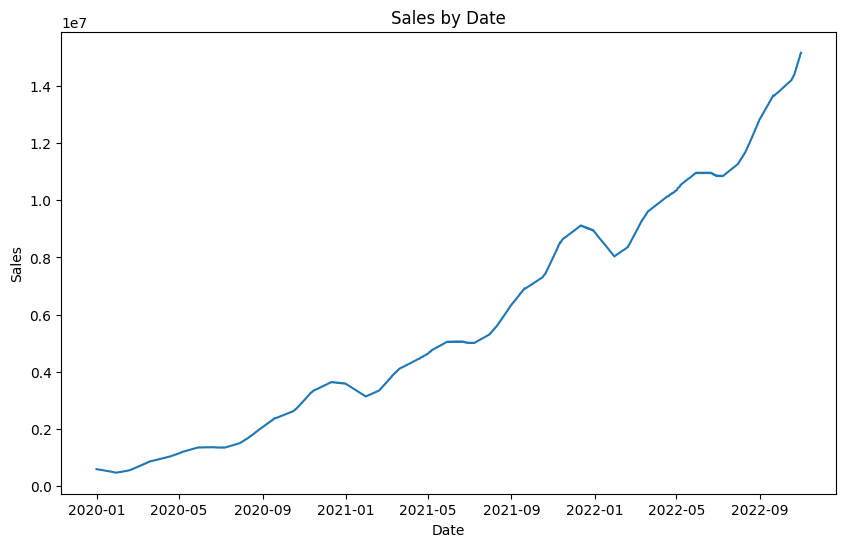

In [8]:
from matplotlib import pyplot
sales = copy.groupby('Date',as_index=False).Quantity_Sold.sum()
# sales
pyplot.figure( figsize=(10, 6) )
pyplot.plot( sales.Date, sales.Quantity_Sold )
pyplot.xlabel('Date')
pyplot.ylabel('Sales')
pyplot.title('Sales by Date')
pyplot.show()

# category-wise

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sales.csv')

In [3]:
data.shape

(5604525, 10)

In [4]:
data.head()

,Date,Country,Place,Product_ID,Category,Price,Discount,Quantity_Sold,Customer_Rating,Total_Sales
0,2020-01-01,India,Delhi,ELE_1,electronics,316.105333,14.666667,116,8,31290.213262
1,2020-01-01,India,Delhi,ELE_2,electronics,852.284000,14.666667,116,9,84364.752213
2,2020-01-01,India,Delhi,ELE_3,electronics,1048.349333,14.666667,116,7,103772.606009
3,2020-01-01,India,Delhi,ELE_4,electronics,1706.568667,14.666667,99,7,144170.920960
4,2020-01-01,India,Delhi,ELE_5,electronics,810.270000,14.666667,116,4,80205.926400


In [6]:
data.Date = pd.to_datetime( data.Date )

In [12]:
category_data = dict( (cat, data[ data.Category == cat ].drop('Category', axis=1) ) for cat in data.Category.unique() )
category_data.keys()

dict_keys(['electronics', 'clothing', 'home', 'toys', 'beauty', 'sports', 'furniture', 'outdoor', 'musical', 'office', 'kitchen', 'tools', 'fitness', 'automotive', 'luggage', 'jewelry', 'garden', 'pet', 'cleaning', 'camping'])

In [13]:
# to do monthly prediction

# for cat in category_data.keys():
#   category_data[cat]['Month'] = category_data[cat].Date.dt.to_period('M')

# category_data['electronics'].head()

In [14]:
[ ( cat, category_data[cat].shape ) for cat in category_data.keys() ]

[('electronics', (300150, 9)),
 ('clothing', (269100, 9)),
 ('home', (274275, 9)),
 ('toys', (284625, 9)),
 ('beauty', (258750, 9)),
 ('sports', (294975, 9)),
 ('furniture', (258750, 9)),
 ('outdoor', (279450, 9)),
 ('musical', (305325, 9)),
 ('office', (258750, 9)),
 ('kitchen', (289800, 9)),
 ('tools', (274275, 9)),
 ('fitness', (284625, 9)),
 ('automotive', (300150, 9)),
 ('luggage', (263925, 9)),
 ('jewelry', (279450, 9)),
 ('garden', (258750, 9)),
 ('pet', (305325, 9)),
 ('cleaning', (294975, 9)),
 ('camping', (269100, 9))]

In [15]:
category_data['electronics'].shape

(300150, 9)

In [16]:
category_sales = {}
for cat in category_data.keys():
  category_sales[cat] = category_data[cat][ ['Date', 'Quantity_Sold', 'Total_Sales'] ].sort_values('Date')
  category_sales[cat] = category_data[cat].groupby('Date').agg({
    'Quantity_Sold' : 'sum',
    'Total_Sales' : 'sum',
  }).reset_index()

category_sales['electronics'].head()


,Date,Quantity_Sold,Total_Sales
0,2020-01-01,32076,2.274308e+07
1,2020-01-02,31860,2.272220e+07
2,2020-01-03,31540,2.257869e+07
3,2020-01-04,31430,2.254391e+07
4,2020-01-05,31218,2.252349e+07


In [17]:
category_sales['electronics'].shape

(1035, 3)

In [18]:

# ----------------------
# Monthly sales figure
# ----------------------

# pyplot.figure( figsize=(10, 6) )

# pyplot.plot( category_sales['electronics'].Month.dt.to_timestamp().dt.date,
#             category_sales['electronics'].Quantity_Sold )

# pyplot.xlabel('Month')
# pyplot.ylabel('Sales')

# pyplot.title('Sales by Month')
# pyplot.show()


In [19]:
# [ ( cat, category_sales[cat].shape ) for cat in category_sales.keys() ]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = dict( zip( category_sales.keys(), [StandardScaler()] * len(category_sales.keys()) ) )

for cat in category_sales.keys():

  category_sales[cat][['Quantity_Sold']] = scaler[cat].fit_transform( category_sales[cat][['Quantity_Sold']] )


category_sales['electronics'].head()

,Date,Quantity_Sold,Total_Sales
0,2020-01-01,-1.301435,2.274308e+07
1,2020-01-02,-1.302439,2.272220e+07
2,2020-01-03,-1.303927,2.257869e+07
3,2020-01-04,-1.304439,2.254391e+07
4,2020-01-05,-1.305424,2.252349e+07


In [21]:
# [ ( cat, category_sales[cat].shape ) for cat in category_sales.keys() ]

In [22]:
# category_sales['electronics'].info()

In [23]:

cat_dates, cat_sales ={}, {}

for cat in category_sales.keys():
  cat_dates[cat] = category_sales[cat].Date.dt.date.values
  cat_sales[cat] = category_sales[cat].Quantity_Sold.values

print( cat_dates['electronics'].shape )
print( cat_sales['electronics'].shape )


(1035,)
(1035,)


In [24]:
ind = int( cat_sales['electronics'].shape[0] * 0.8 )
ind

828

In [25]:

train, test = {}, {}

train_dates, test_dates = {}, {}

for cat in cat_sales.keys():

  train[cat], test[cat] = cat_sales[cat] [ : ind ].reshape(-1,1), cat_sales[cat] [ ind : ].reshape(-1,1)
  train_dates[cat], test_dates[cat] = cat_dates[cat] [ : ind ], cat_dates[cat] [ ind : ]

print( train['electronics'].shape, test['electronics'].shape )
print( train_dates['electronics'].shape, test_dates['electronics'].shape )

(828, 1) (207, 1)
(828,) (207,)


In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
inp = 180
out = 1

train_gen = {}
test_gen = {}

for cat in train.keys():

  train_gen[cat] = TimeseriesGenerator( train[cat], train[cat], length=inp, batch_size=1 )

  test_gen[cat] = TimeseriesGenerator( test[cat], test[cat], length=inp, batch_size=1 )



In [28]:
print( train['electronics'][inp:].shape )
print( train_dates['electronics'][inp:].shape )

(648, 1)
(648,)


In [29]:
ytrain = {}
ytest = {}

ytrain_dates = {}
ytest_dates = {}

for cat in train.keys():

  ytrain[ cat ], ytest[ cat ] = train[cat][ inp : ], test[cat][ inp : ]

  ytrain_dates[ cat ], ytest_dates[ cat ] = train_dates[cat][ inp : ], test_dates[cat][ inp : ]


# Load Models


In [26]:
# import os
# from tensorflow.keras.models import load_model

# path = 'Models'

# models = {}

# for item in os.listdir(path):
    
#     models[item] = load_model( os.path.join(path, item) )

In [27]:

from tensorflow.keras.models import load_model

models = {}

for cat in category_sales.keys():

    models[cat] = load_model( f"Models/{cat}.keras" )



In [28]:
print( list( models.keys() ) )

['electronics', 'clothing', 'home', 'toys', 'beauty', 'sports', 'furniture', 'outdoor', 'musical', 'office', 'kitchen', 'tools', 'fitness', 'automotive', 'luggage', 'jewelry', 'garden', 'pet', 'cleaning', 'camping']


# Model

In [318]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from sklearn.metrics import r2_score

In [319]:

models = {}

for cat in train_gen.keys():

  models[cat] = Sequential()

  models[cat].add( Input( shape = (inp, out) ))
  models[cat].add( LSTM( 100 ) )
  models[cat].add( Dense(1) )

  models[cat].compile( optimizer='adam', loss='mse' )


In [320]:
history = {}

for i, cat in enumerate(models.keys()):

  print( i + 1, ' : ', cat.upper(), '\n' )

  history[cat] = models[cat].fit( train_gen[cat], epochs=30, batch_size=1, validation_data=[ test_gen[cat] ] )

  print('\n')
  print( '*'*200 )
  print('\n')


1  :  ELECTRONICS 

Epoch 1/30
648/648 [==============================] - 16s 22ms/step - loss: 0.0052 - val_loss: 0.0642
Epoch 2/30
648/648 [==============================] - 13s 21ms/step - loss: 4.1043e-04 - val_loss: 0.0085
Epoch 3/30
648/648 [==============================] - 15s 23ms/step - loss: 3.4999e-04 - val_loss: 0.0055
Epoch 4/30
648/648 [==============================] - 15s 23ms/step - loss: 1.8991e-04 - val_loss: 0.0016
Epoch 5/30
648/648 [==============================] - 15s 23ms/step - loss: 2.2460e-04 - val_loss: 0.0080
Epoch 6/30
648/648 [==============================] - 16s 24ms/step - loss: 1.8284e-04 - val_loss: 5.7952e-04
Epoch 7/30
648/648 [==============================] - 15s 23ms/step - loss: 3.2326e-04 - val_loss: 5.1768e-04
Epoch 8/30
648/648 [==============================] - 15s 22ms/step - loss: 9.5936e-05 - val_loss: 0.0013
Epoch 9/30
648/648 [==============================] - 14s 22ms/step - loss: 1.6563e-04 - val_loss: 0.0017
Epoch 10/30
648/648 [=

In [ ]:
# for cat in models.keys():
#   models[cat].save( f'Models/{cat}.keras' )

In [ ]:
# data.to_csv( 'sales.csv', index=False )

# Evaluation

In [30]:
from sklearn.metrics import r2_score

In [ ]:
ypred_train = {}

for cat in models.keys():
  print( cat.upper(), '\n' )
  ypred_train[cat] = models[cat].predict( train_gen[cat] )
  print('\nr2_score : ', r2_score( ytrain[cat] , ypred_train[cat] ) )
  print('\n')

In [ ]:
ypred_test = {}

for i, cat in enumerate( models.keys(), start=1 ):
  print( i, ' : ', cat.upper(), '\n' )
  ypred_test[cat] = models[cat].predict( test_gen[cat]  )
  print( "\nr2_score : ", r2_score( ytest[cat] , ypred_test[cat] ) )
  print('\n')

In [ ]:
loss = {}
val_loss = {}

for cat in models.keys():
  loss[cat] = history[cat].history['loss']
  val_loss[cat] = history[cat].history['val_loss']

NameError: name 'loss' is not defined

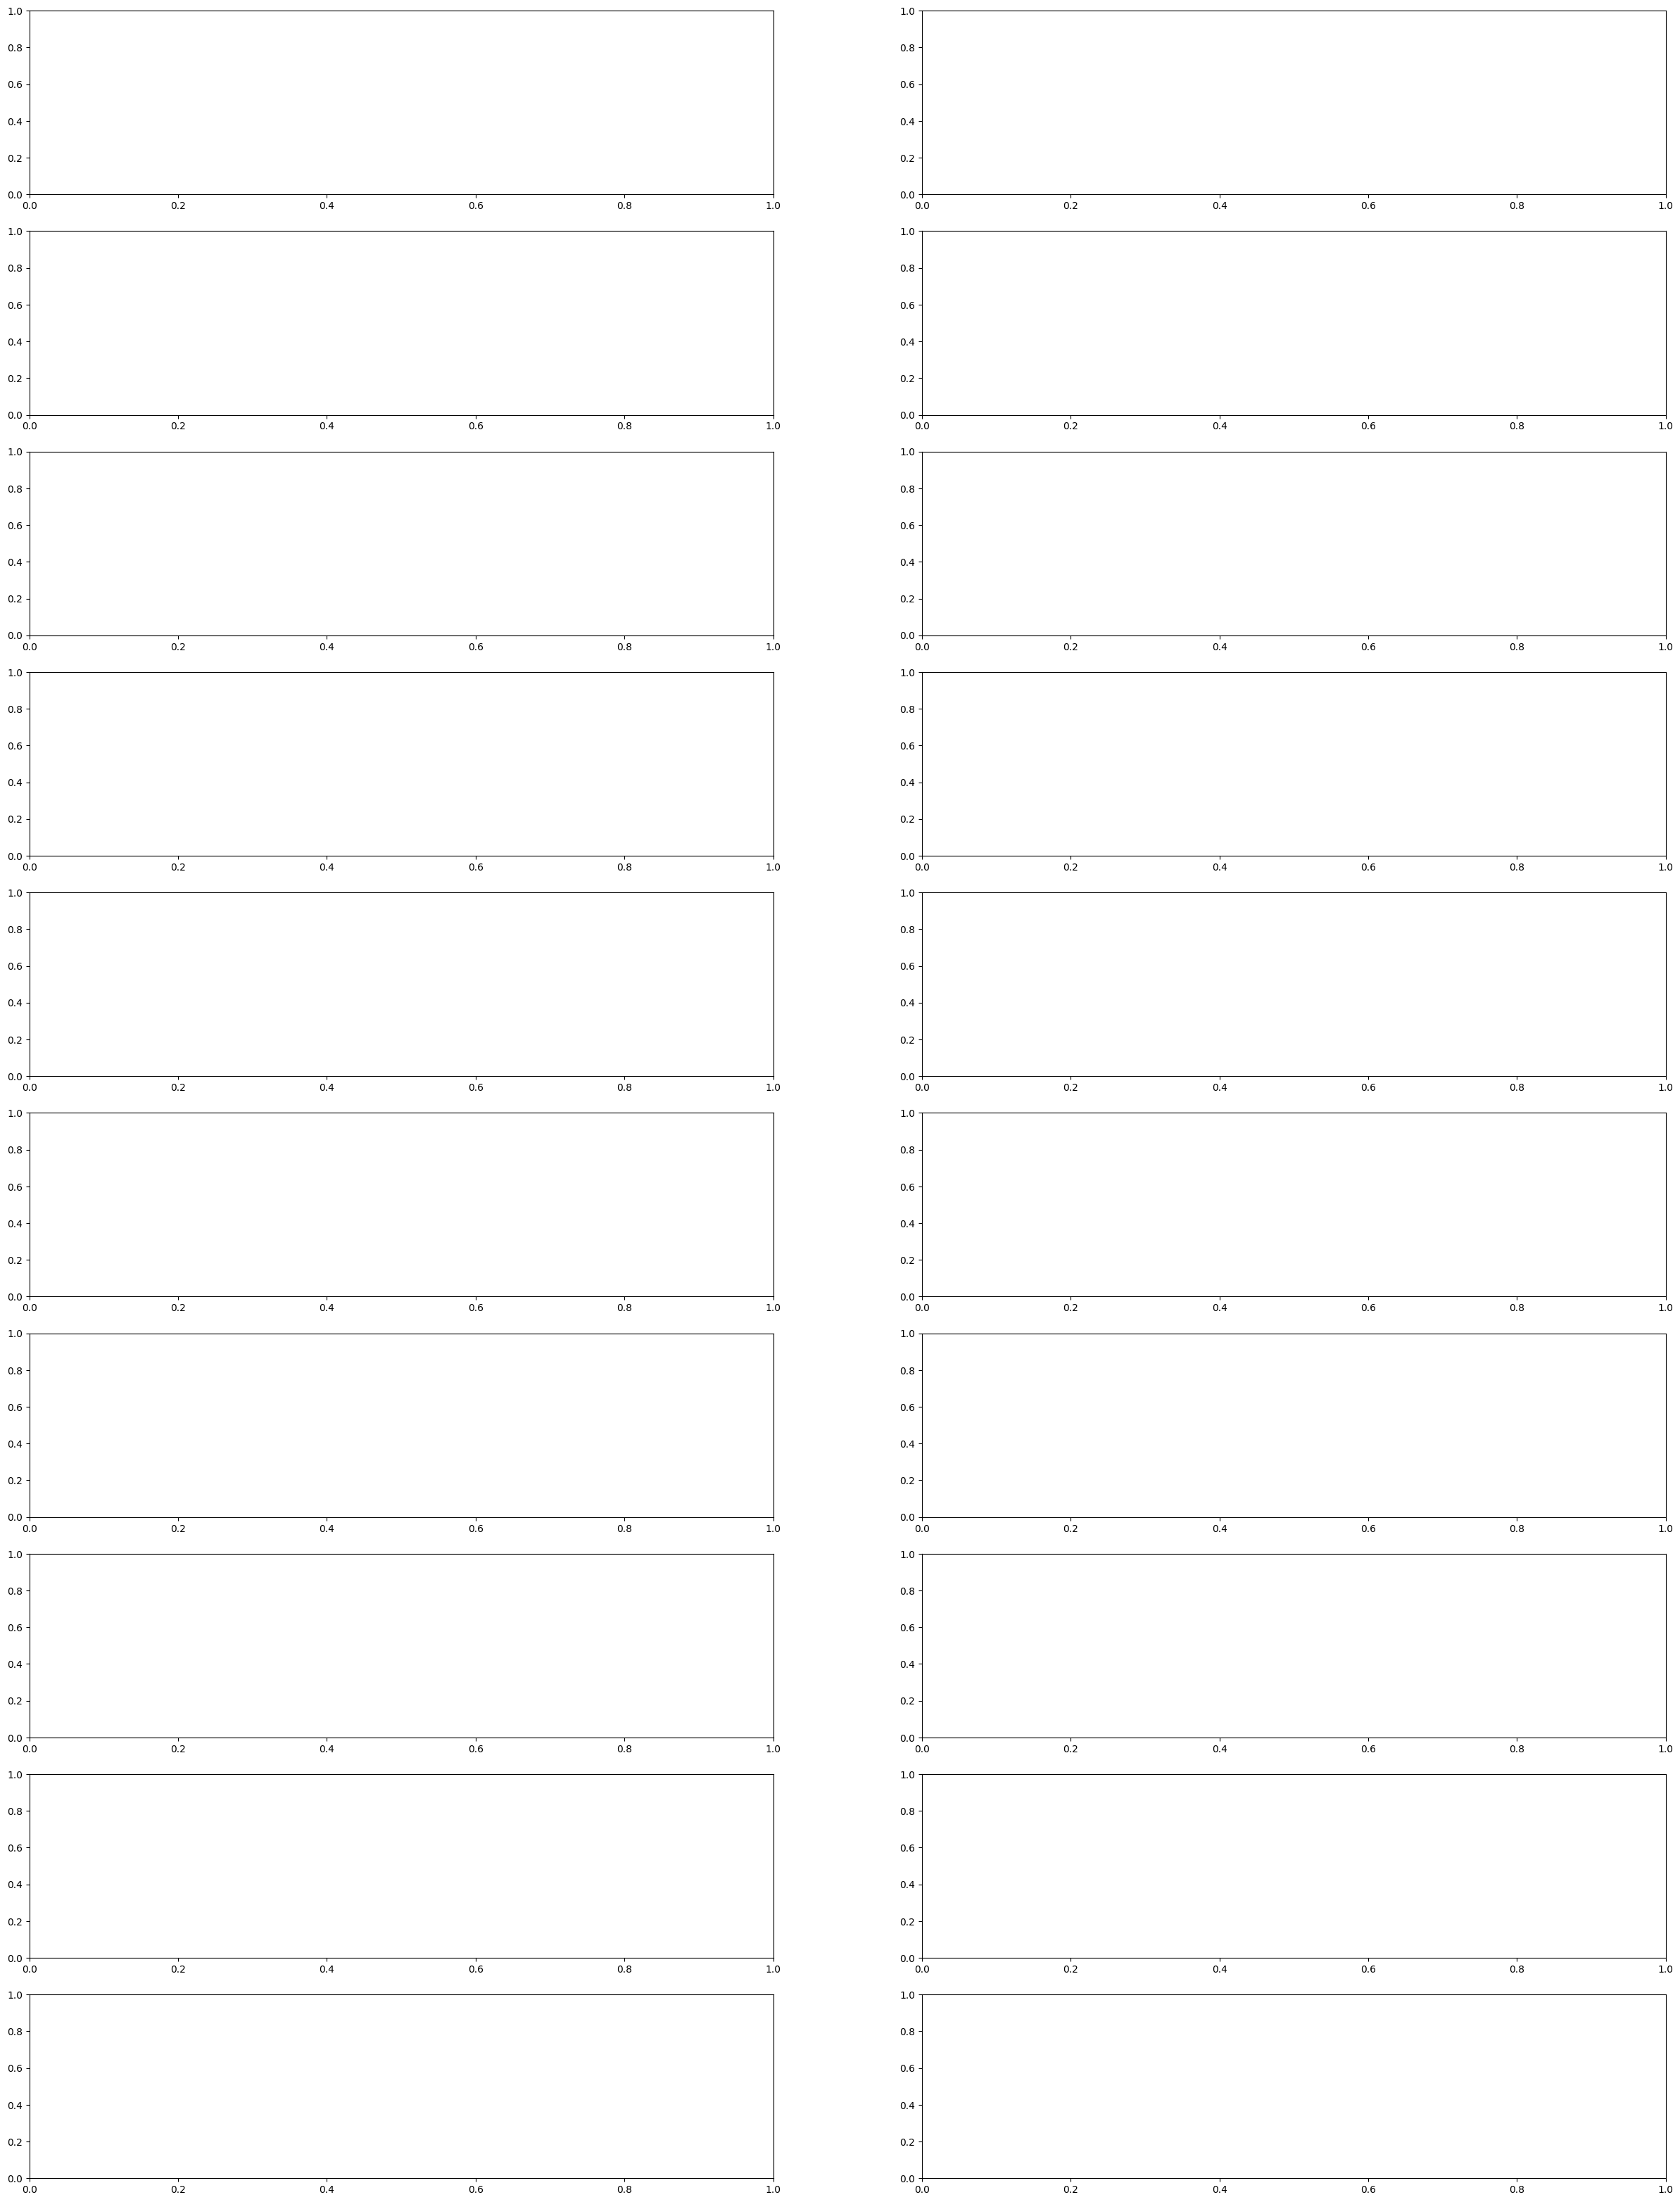

In [87]:

from matplotlib import pyplot

fig, ax = pyplot.subplots( nrows=10, ncols=2, figsize=( 30 , 40) )

for ax, cat in zip( ax.flatten(), models.keys()):
  ax.plot( loss[cat], label='Training Loss')
  ax.plot( val_loss[cat], label='Validation Loss')

  ax.set_title(f'Training and Validation Loss - {cat}')
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')

  ax.set_xticks( range(1, 51) )

pyplot.tight_layout()
pyplot.show()

In [89]:
actual_train = {}

for cat in ytrain.keys():
  actual_train[cat] = scaler[cat].inverse_transform( ytrain[cat] )

# actual_train['electronics']

In [90]:
pre_train = {}

for cat in ytrain.keys():
  pre_train[cat] = scaler[cat].inverse_transform( ypred_train[cat] )

# pre_train['electronics']

KeyError: 'clothing'

In [91]:
actual_test = {}

for cat in ytrain.keys():
  actual_test[cat] = scaler[cat].inverse_transform( ytest[cat] )

# actual_test['electronics']


In [92]:
pre_test = {}

for cat in ytrain.keys():
  pre_test[cat] = scaler[cat].inverse_transform( ypred_test[cat] )

# pre_test['electronics']


KeyError: 'clothing'

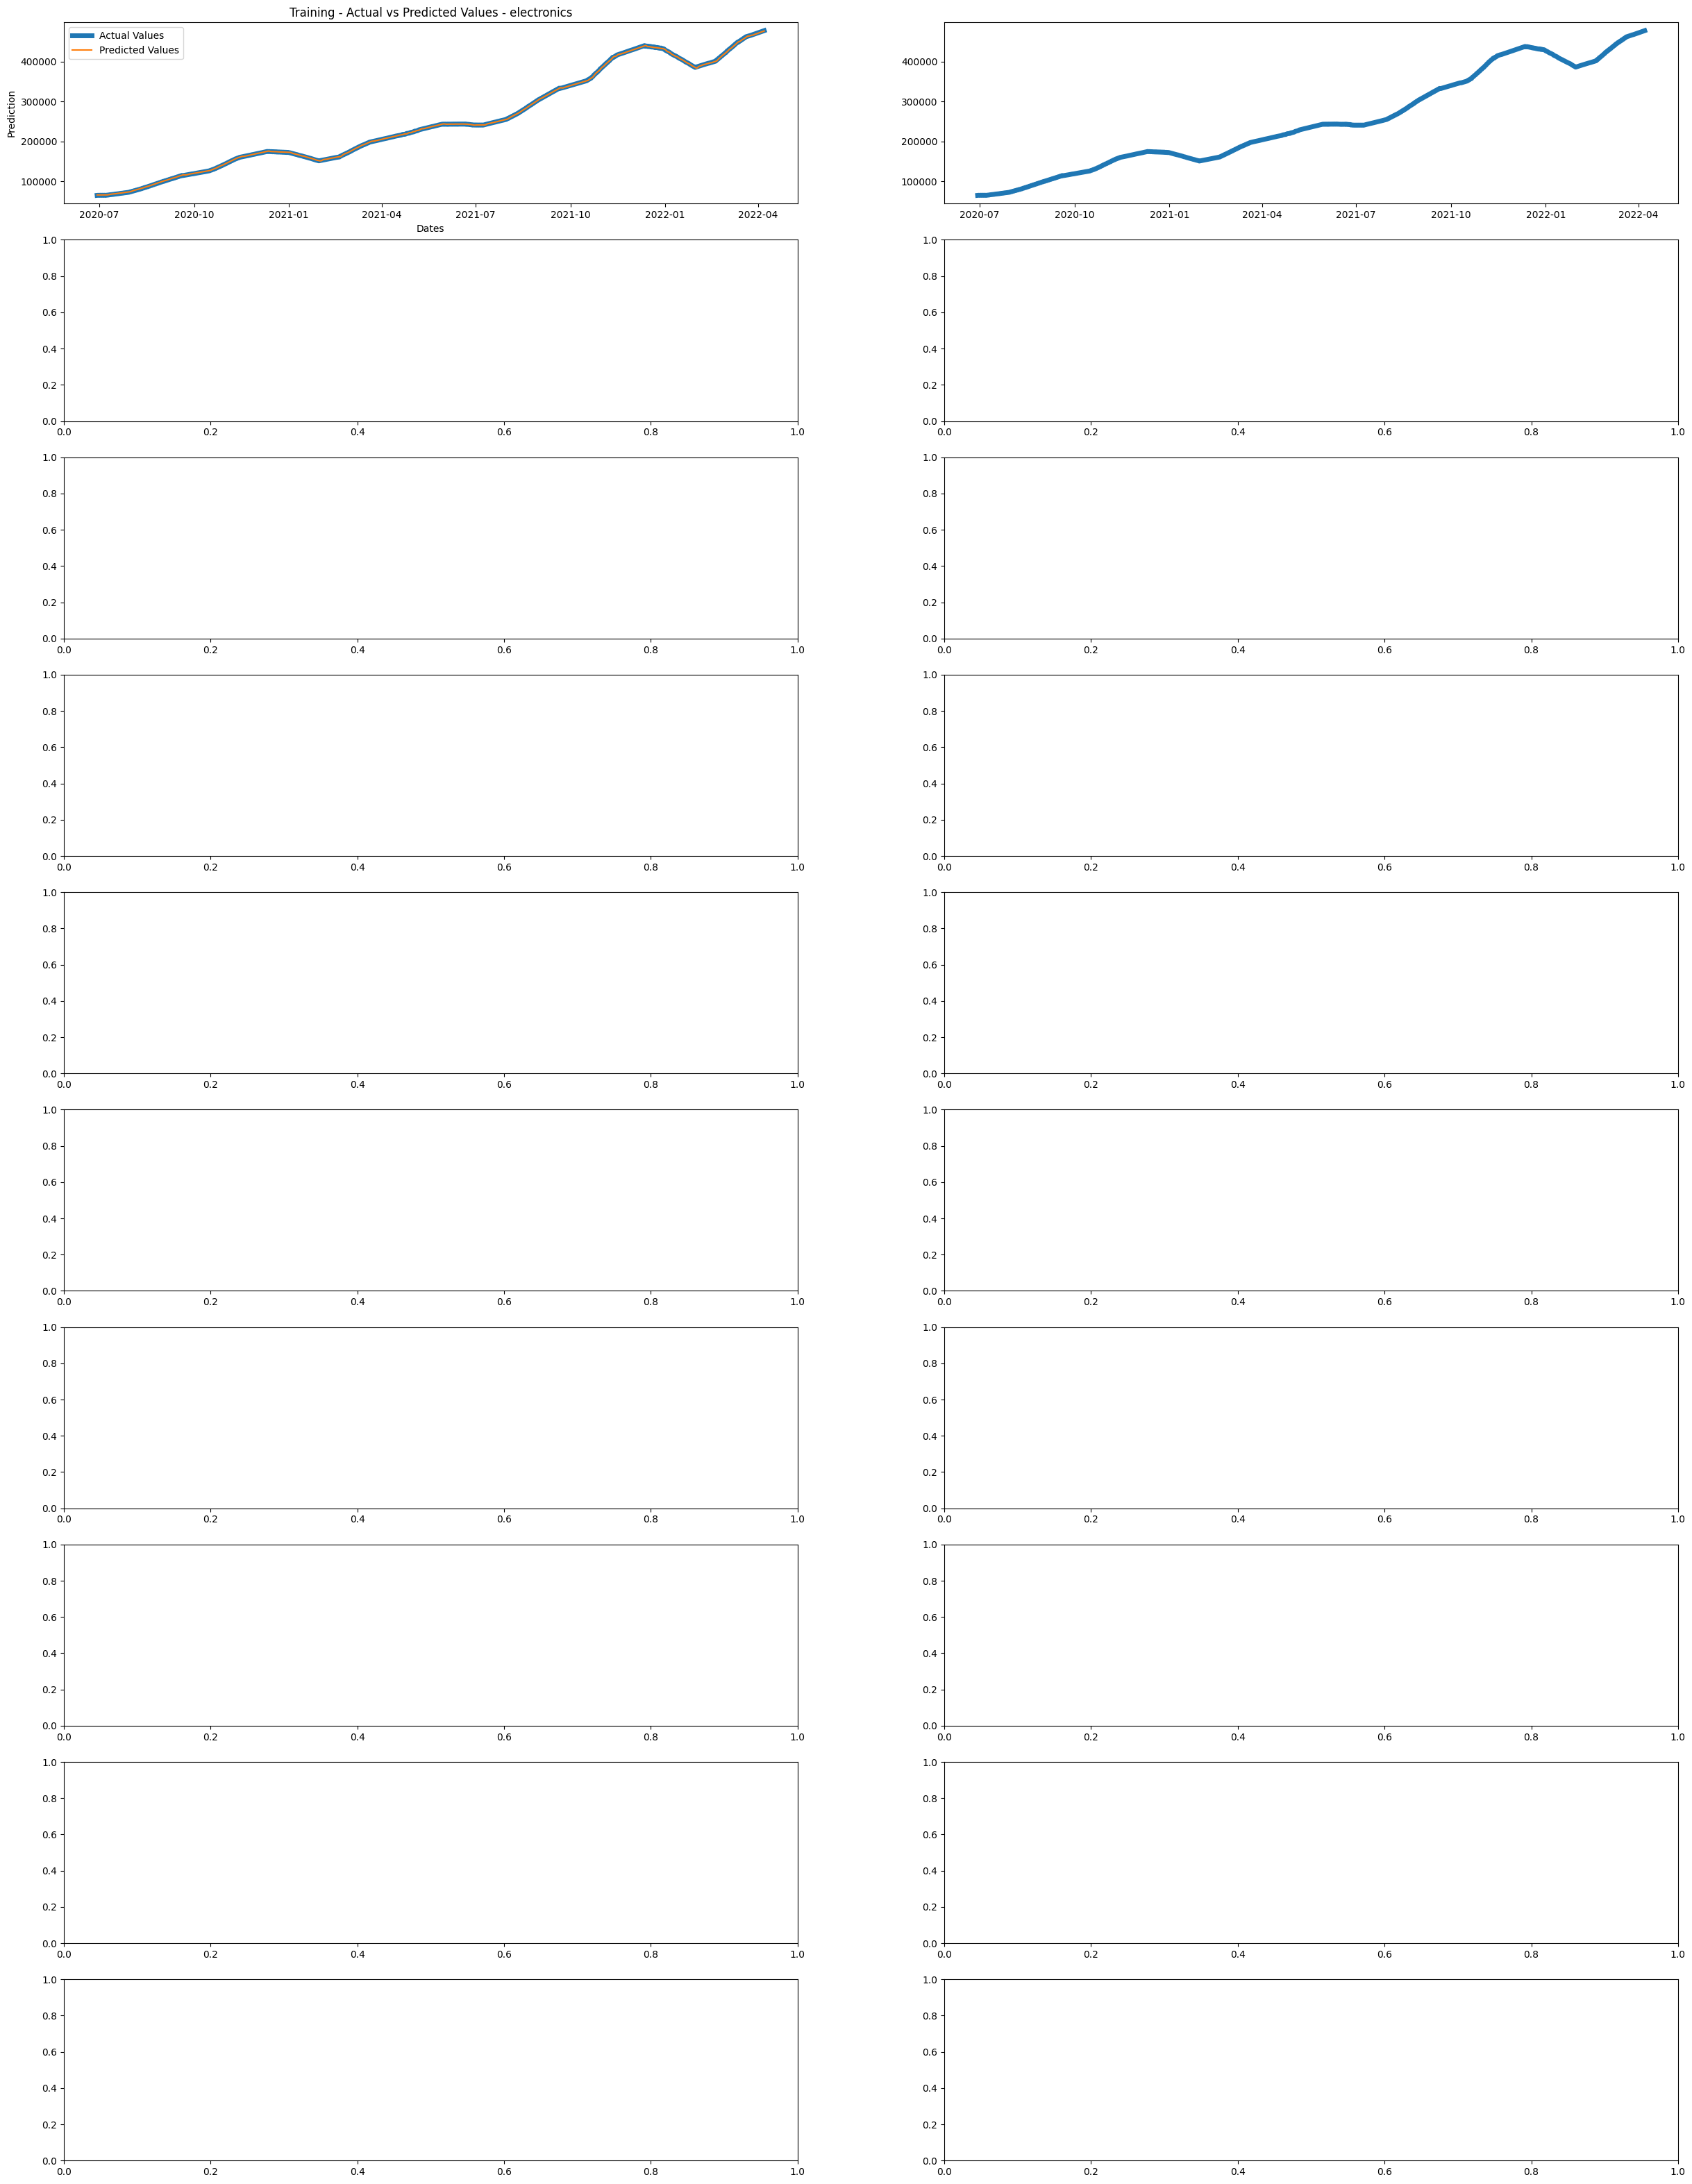

In [93]:
from matplotlib import pyplot

fig, ax = pyplot.subplots( nrows=10, ncols=2, figsize=( 30 , 40) )

for ax, cat in zip( ax.flatten(), models.keys()):
  ax.plot( ytrain_dates[cat], actual_train[cat], label='Actual Values', linewidth=5)
  ax.plot( ytrain_dates[cat], pre_train[cat], label='Predicted Values')

  ax.set_title(f'Training - Actual vs Predicted Values - {cat}')
  ax.set_xlabel('Dates')
  ax.set_ylabel('Prediction')
  ax.legend()

pyplot.tight_layout()
pyplot.show()


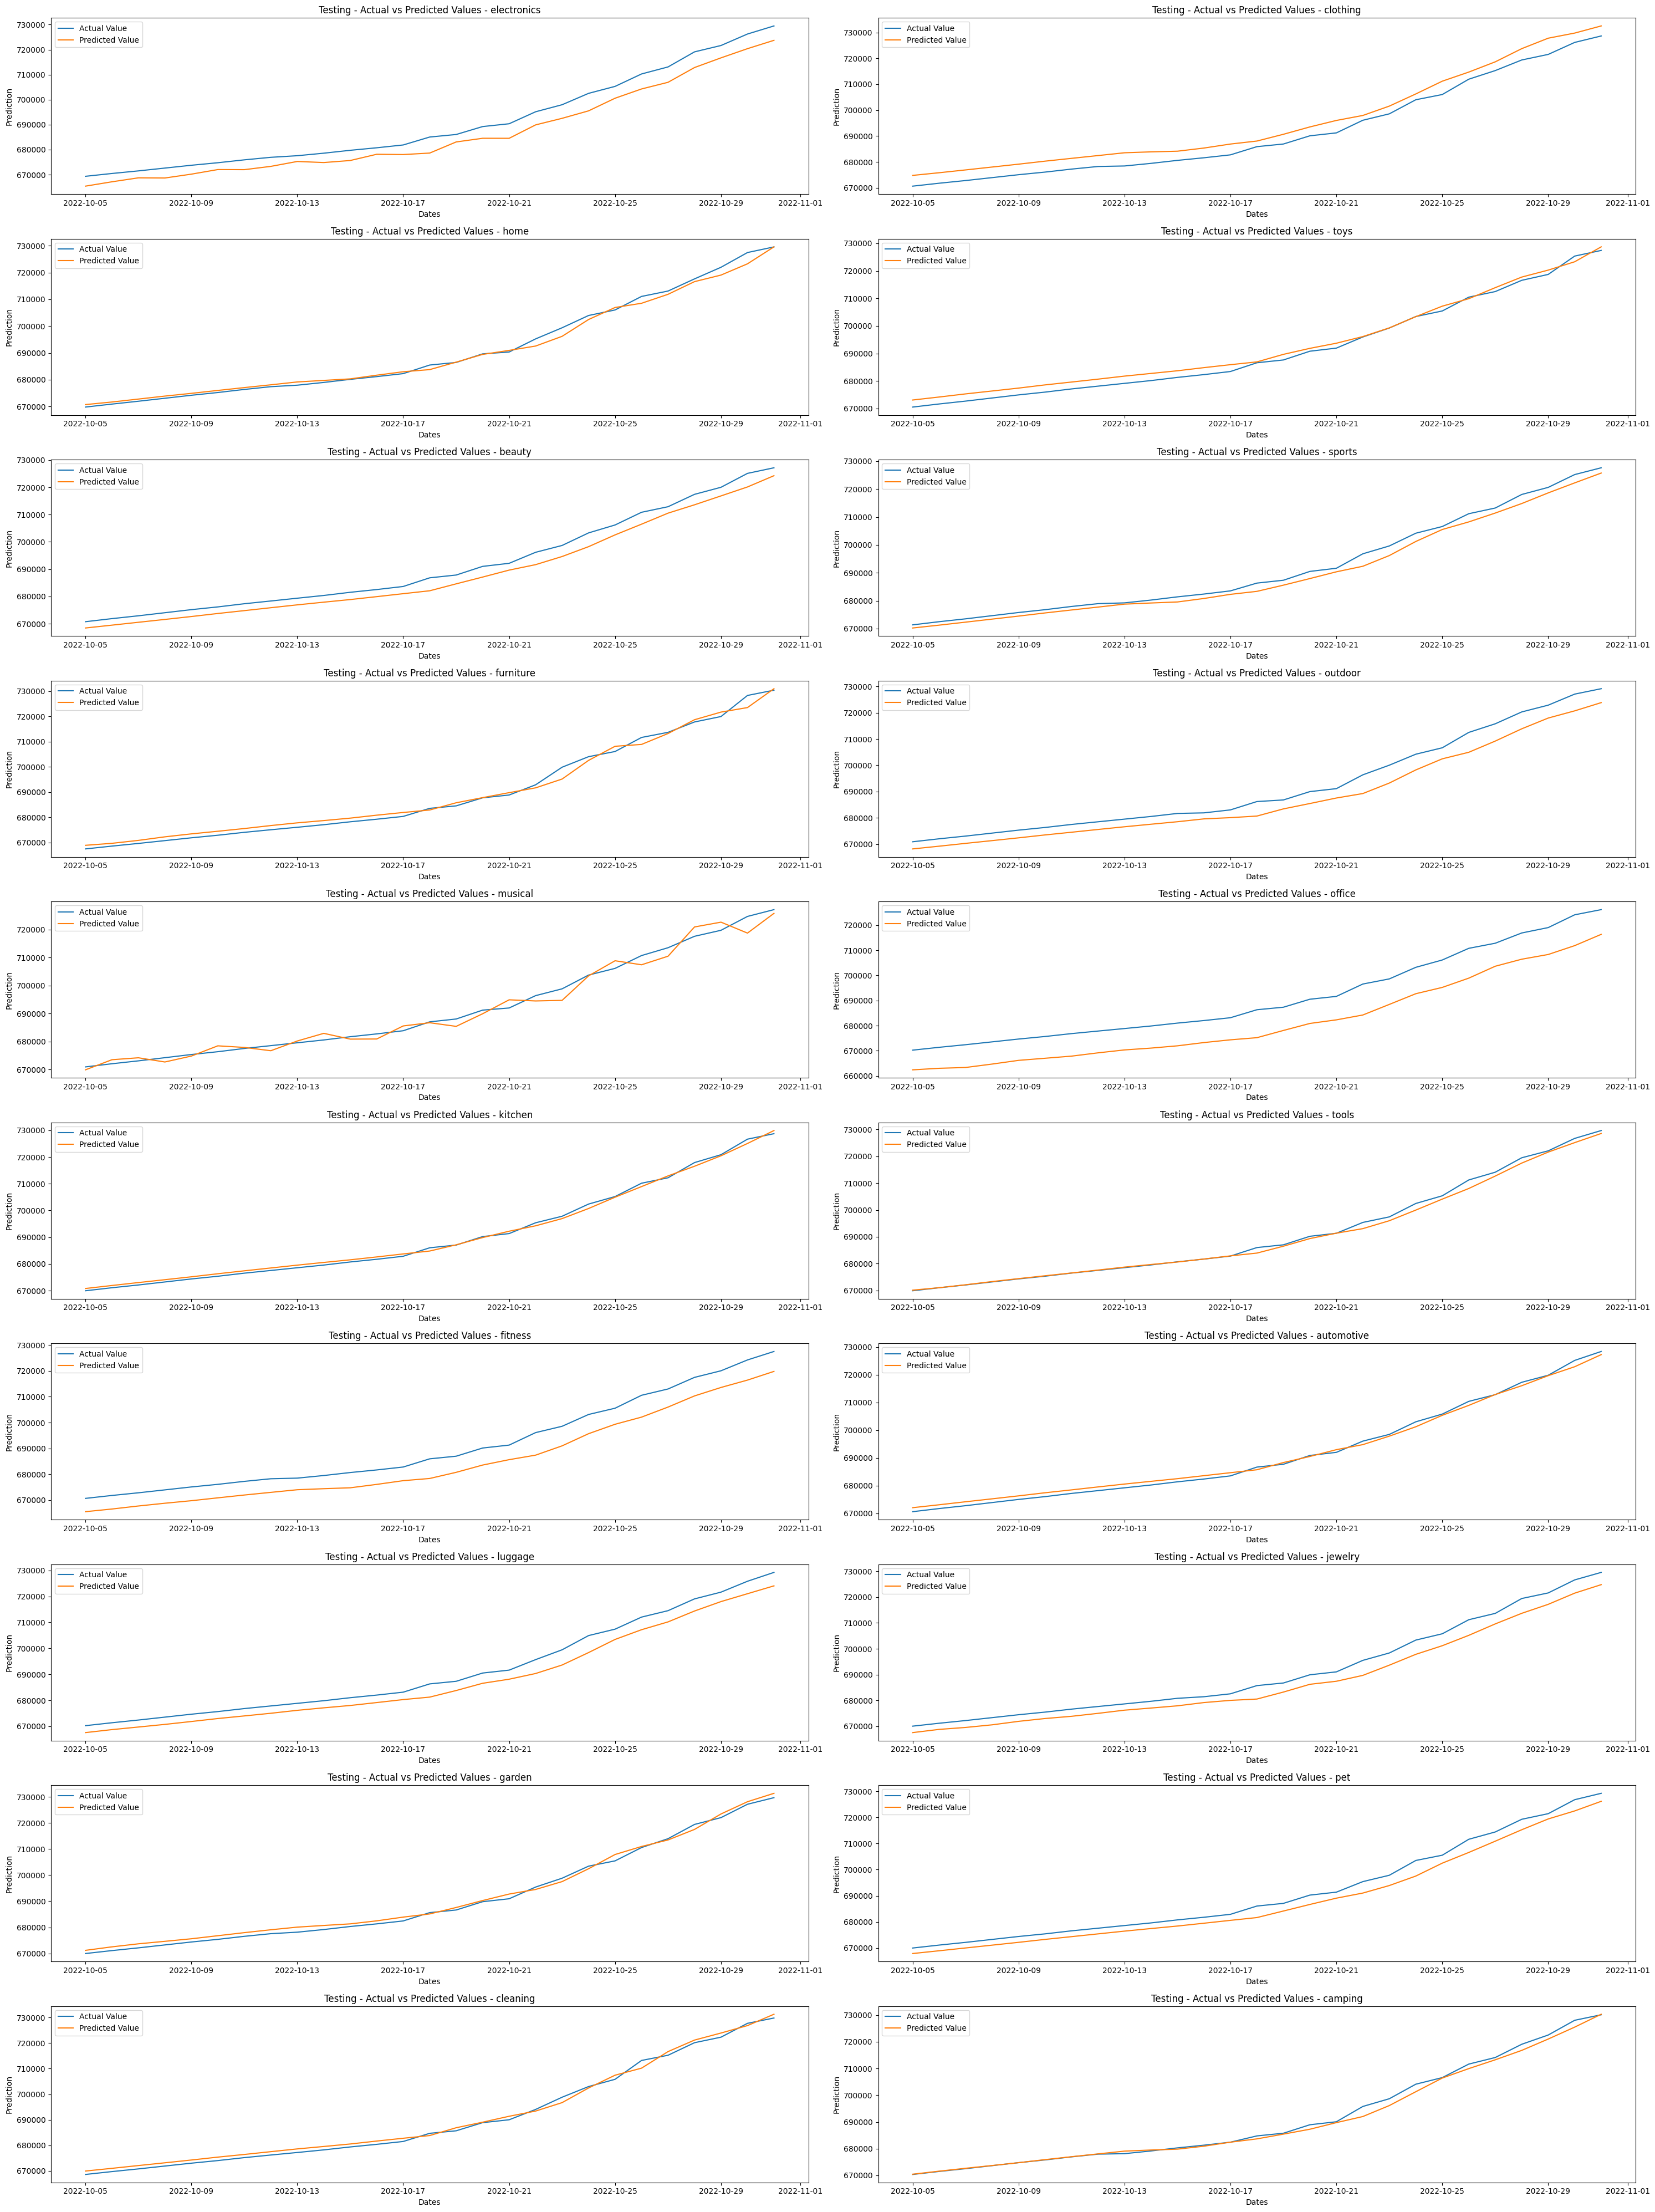

In [ ]:
from matplotlib import pyplot

fig, ax = pyplot.subplots( nrows=10, ncols=2, figsize=( 30 , 40) )

for ax, cat in zip( ax.flatten(), models.keys()):
  ax.plot( ytest_dates[cat], actual_test[cat], label='Actual Value')
  ax.plot( ytest_dates[cat], pre_test[cat], label='Predicted Value')

  ax.set_title(f'Testing - Actual vs Predicted Values - {cat}')
  ax.set_xlabel('Dates')
  ax.set_ylabel('Prediction')
  ax.legend()

pyplot.tight_layout()
pyplot.show()



In [ ]:
data.head()

,Date,Country,Place,Product_ID,Category,Price,Discount,Quantity_Sold,Customer_Rating,Total_Sales
0,2020-01-01,India,Delhi,ELE_1,electronics,316.105333,14.666667,116,8,31290.213262
1,2020-01-01,India,Delhi,ELE_2,electronics,852.284000,14.666667,116,9,84364.752213
2,2020-01-01,India,Delhi,ELE_3,electronics,1048.349333,14.666667,116,7,103772.606009
3,2020-01-01,India,Delhi,ELE_4,electronics,1706.568667,14.666667,99,7,144170.920960
4,2020-01-01,India,Delhi,ELE_5,electronics,810.270000,14.666667,116,4,80205.926400


In [ ]:
data.Price = data.Price.astype( int )
data.head()

,Date,Country,Place,Product_ID,Category,Price,Discount,Quantity_Sold,Customer_Rating,Total_Sales
0,2020-01-01,India,Delhi,ELE_1,electronics,316,14.666667,116,8,31290.213262
1,2020-01-01,India,Delhi,ELE_2,electronics,852,14.666667,116,9,84364.752213
2,2020-01-01,India,Delhi,ELE_3,electronics,1048,14.666667,116,7,103772.606009
3,2020-01-01,India,Delhi,ELE_4,electronics,1706,14.666667,99,7,144170.920960
4,2020-01-01,India,Delhi,ELE_5,electronics,810,14.666667,116,4,80205.926400


In [ ]:
data2 = data.copy()

# Save

In [344]:
print( data.Category.unique().tolist() )
print( list(category_sales.keys()) )

['electronics', 'clothing', 'home', 'toys', 'beauty', 'sports', 'furniture', 'outdoor', 'musical', 'office', 'kitchen', 'tools', 'fitness', 'automotive', 'luggage', 'jewelry', 'garden', 'pet', 'cleaning', 'camping']
['electronics', 'clothing', 'home', 'toys', 'beauty', 'sports', 'furniture', 'outdoor', 'musical', 'office', 'kitchen', 'tools', 'fitness', 'automotive', 'luggage', 'jewelry', 'garden', 'pet', 'cleaning', 'camping']


In [348]:
category_sales['electronics'].head()

,Date,Quantity_Sold
0,2020-01-01,-1.301435
1,2020-01-02,-1.302439
2,2020-01-03,-1.303927
3,2020-01-04,-1.304439
4,2020-01-05,-1.305424


In [ ]:
category_data['electronics'].head()

,Date,Country,Place,Product_ID,Price,Discount,Quantity_Sold,Customer_Rating,Total_Sales
0,2020-01-01,India,Delhi,ELE_1,316.105333,14.666667,116,8,31290.213262
1,2020-01-01,India,Delhi,ELE_2,852.284000,14.666667,116,9,84364.752213
2,2020-01-01,India,Delhi,ELE_3,1048.349333,14.666667,116,7,103772.606009
3,2020-01-01,India,Delhi,ELE_4,1706.568667,14.666667,99,7,144170.920960
4,2020-01-01,India,Delhi,ELE_5,810.270000,14.666667,116,4,80205.926400


In [ ]:
category_sales = {}

for cat in category_data.keys():
  category_sales[cat] = category_data[cat][ ['Date', 'Quantity_Sold'] ].sort_values('Date')
  category_sales[cat] = category_data[cat].groupby('Date').Quantity_Sold.sum().reset_index()


,Date,Quantity_Sold
0,2020-01-01,32076
1,2020-01-02,31860
2,2020-01-03,31540
3,2020-01-04,31430
4,2020-01-05,31218


In [388]:
category_sales['electronics'].head()

,Date,Quantity_Sold
0,2020-01-01,32076
1,2020-01-02,31860
2,2020-01-03,31540
3,2020-01-04,31430
4,2020-01-05,31218


In [ ]:
# for cat in category_sales.keys():
#     category_sales[cat].drop(['Prediction'], axis=1, inplace=True)

In [389]:

inp = 180

for i, cat in enumerate( category_sales.keys(), start = 1 ):

  print(str(i), cat )

  scaled_values =  scaler[cat].transform( category_sales[cat][['Quantity_Sold']] ) 
  
  tseries = TimeseriesGenerator( scaled_values, scaled_values, length=inp, batch_size=1 )

  pred = models[cat].predict( tseries )
  
  category_sales[cat].loc[  inp : , 'Prediction' ] = scaler[cat].inverse_transform( pred )
  

1 electronics
855/855 [==============================] - 10s 12ms/step
2 clothing
855/855 [==============================] - 10s 12ms/step
3 home
855/855 [==============================] - 10s 12ms/step
4 toys
855/855 [==============================] - 10s 11ms/step
5 beauty
855/855 [==============================] - 11s 13ms/step
6 sports
855/855 [==============================] - 11s 13ms/step
7 furniture
855/855 [==============================] - 11s 12ms/step
8 outdoor
855/855 [==============================] - 10s 12ms/step
9 musical
855/855 [==============================] - 10s 12ms/step
10 office
855/855 [==============================] - 10s 11ms/step
11 kitchen
855/855 [==============================] - 11s 13ms/step
12 tools
855/855 [==============================] - 10s 12ms/step
13 fitness
855/855 [==============================] - 11s 12ms/step
14 automotive
855/855 [==============================] - 10s 12ms/step
15 luggage
855/855 [==============================] - 10s 

In [390]:
category_sales['electronics'].iloc[180:].head()

,Date,Quantity_Sold,Prediction
180,2020-06-29,72881,73950.218750
181,2020-06-30,73171,73851.578125
182,2020-07-01,72881,73911.046875
183,2020-07-02,73347,73935.796875
184,2020-07-03,72881,74124.421875


In [391]:
category_sales['electronics'].head()

,Date,Quantity_Sold,Prediction
0,2020-01-01,32076,NaN
1,2020-01-02,31860,NaN
2,2020-01-03,31540,NaN
3,2020-01-04,31430,NaN
4,2020-01-05,31218,NaN


In [392]:
for cat in category_sales.keys():
    category_sales[cat].Prediction = category_sales[cat].Prediction.fillna(0).astype('int64')
    

In [393]:
category_sales['tools'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1035 non-null   datetime64[ns]
 1   Quantity_Sold  1035 non-null   int64         
 2   Prediction     1035 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 24.4 KB


In [394]:
category_sales['tools'].head()

,Date,Quantity_Sold,Prediction
0,2020-01-01,29176,0
1,2020-01-02,29002,0
2,2020-01-03,28738,0
3,2020-01-04,28647,0
4,2020-01-05,28457,0


In [397]:
for cat in category_sales.keys():
  category_sales[cat]['Category'] = cat

In [398]:
category_sales['tools'].head()

,Date,Quantity_Sold,Prediction,Category
0,2020-01-01,29176,0,tools
1,2020-01-02,29002,0,tools
2,2020-01-03,28738,0,tools
3,2020-01-04,28647,0,tools
4,2020-01-05,28457,0,tools


In [399]:
daily_sales = pd.concat( category_sales.values(), axis=0 )

In [402]:
daily_sales

,Date,Quantity_Sold,Prediction,Category
0,2020-01-01,32076,0,electronics
1,2020-01-02,31860,0,electronics
2,2020-01-03,31540,0,electronics
3,2020-01-04,31430,0,electronics
4,2020-01-05,31218,0,electronics
...,...,...,...,...
1030,2022-10-27,714113,713257,camping
1031,2022-10-28,719072,716779,camping
1032,2022-10-29,722535,721028,camping
1033,2022-10-30,728052,725495,camping


In [401]:
print( 'categories in daily sales : \n\n', daily_sales.Category.unique(), '\n\n' )
print( 'Dates : ', daily_sales.Date.unique().shape )

categories in daily sales : 

 ['electronics' 'clothing' 'home' 'toys' 'beauty' 'sports' 'furniture'
 'outdoor' 'musical' 'office' 'kitchen' 'tools' 'fitness' 'automotive'
 'luggage' 'jewelry' 'garden' 'pet' 'cleaning' 'camping'] 


Dates :  (1035,)


In [408]:
# daily_sales.to_csv('daily_sales.csv', index=False)

# New Predictions

In [33]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('daily_sales.csv')

In [12]:
df.head()

,Date,Quantity_Sold,Prediction,Category
0,2020-01-01,32076,0,electronics
1,2020-01-02,31860,0,electronics
2,2020-01-03,31540,0,electronics
3,2020-01-04,31430,0,electronics
4,2020-01-05,31218,0,electronics


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20700 entries, 0 to 20699
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           20700 non-null  object
 1   Quantity_Sold  20700 non-null  int64 
 2   Prediction     20700 non-null  int64 
 3   Category       20700 non-null  object
dtypes: int64(2), object(2)
memory usage: 647.0+ KB


In [14]:
df.shape

(20700, 4)

In [25]:
df.head()

,Date,Quantity_Sold,Prediction,Category
0,2020-01-01,32076,0,electronics
1,2020-01-02,31860,0,electronics
2,2020-01-03,31540,0,electronics
3,2020-01-04,31430,0,electronics
4,2020-01-05,31218,0,electronics


In [36]:
df.head()

,Date,Quantity_Sold,Prediction,Category,Total_Sales
0,2020-01-01,32076,0,electronics,2.274308e+07
1,2020-01-02,31860,0,electronics,2.272220e+07
2,2020-01-03,31540,0,electronics,2.257869e+07
3,2020-01-04,31430,0,electronics,2.254391e+07
4,2020-01-05,31218,0,electronics,2.252349e+07


In [37]:
df.Date = pd.to_datetime(df.Date)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20700 entries, 0 to 20699
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           20700 non-null  datetime64[ns]
 1   Quantity_Sold  20700 non-null  int64         
 2   Prediction     20700 non-null  int64         
 3   Category       20700 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 647.0+ KB


In [39]:
df.head()

,Date,Quantity_Sold,Prediction,Category
0,2020-01-01,32076,0,electronics
1,2020-01-02,31860,0,electronics
2,2020-01-03,31540,0,electronics
3,2020-01-04,31430,0,electronics
4,2020-01-05,31218,0,electronics


In [143]:

def make_prediction( data, category, length ):

    data = data[ data.Category == category ].sort_values('Date')

    tail_data = data.tail(180).Quantity_Sold.values

    scaled_values = scaler[category].transform( tail_data.reshape(-1, 1) )

    out = np.array([])

    for i in range( length ):

        pred = models[category].predict( scaled_values.reshape( (1, 180, 1) ) )

        out = np.append( out, pred )

        scaled_values = np.append( scaled_values[1:], pred )


    return scaler[category].inverse_transform( out.reshape(-1,1) )


print( make_prediction( df, 'electronics', 5 ) )

1/1 [==============================] - 0s 77ms/step


c:\Users\Rey\.conda\envs\py39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
[[811294.39317457]
 [806093.53696035]
 [801521.29814949]
 [799697.34340181]
 [793954.97622794]]
